In [1]:
from sklearn import metrics, model_selection
from gensim.models.word2vec import Word2Vec



In [2]:
import pickle
import numpy as np
import pandas as pd
import re


In [ ]:
# Обучение модели для анализа тональности на твитах

In [3]:
pos = pd.read_csv('positive.csv',sep=';', header=None)
neg = pd.read_csv('negative.csv',sep=';', header=None)
neg[4] =0

In [4]:
data=pd.concat([pos,neg],ignore_index=True)
X = data.iloc[: , 3]
Y = data.iloc[: , 4]

In [5]:
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x))) 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.4, random_state=42)

In [7]:
n_dim = 300
#Initialize model and build vocab
imdb_w2v = Word2Vec(size=n_dim, min_count=10)
imdb_w2v.build_vocab(X_train)

#Train the model over train_reviews (this may take several minutes)
imdb_w2v.train(X_train, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)

C:\Users\1\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


(14978296, 52750875)

In [8]:

#Build word vector for training set by using the average value of all word vectors in the tweet, then scale
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [9]:
from sklearn.preprocessing import scale


In [10]:
train_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X_train])
train_vecs = scale(train_vecs)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [11]:
#Train word2vec on test tweets
imdb_w2v.train(X_test, total_examples=imdb_w2v.corpus_count, epochs=5)

(9976730, 35138850)

In [12]:
#Build test tweet vectors then scale
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X_test])
test_vecs = scale(test_vecs)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [13]:
#Use classification algorithm (i.e. Stochastic Logistic Regression) on training set, then assess model performance on test set
from sklearn.linear_model import SGDClassifier


In [14]:

lr = SGDClassifier(loss='log', penalty='l1')
lr.fit(train_vecs, y_train)



C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
print('Test Accuracy: %.2f'%lr.score(test_vecs, y_test))

Test Accuracy: 0.80


In [ ]:
# Экотеринбург 🍃 эко портал Екатеринбурга

In [72]:
with open("ecoterinburg.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]

In [73]:
data = pd.DataFrame(array)

In [74]:
data.head(10)

,0
0,﻿🍃🍃 ЭкоНовости А осознанных жителей все больш...
1,"""🍃🍃 ЭкоНовости Новость скинули наши читатели...."
2,В содружественной группе конкурс
3,"""🍃🍃ЭкоСобытие Почему в Волге больше нельзя ку..."
4,"""🍃🍃ЭкоНовости Акция раздельного сбора отходов..."
5,"""🍃🍃ЭкоНовости """"В Европе запретили использова..."
6,🍃🍃ЭкоНовости 🌍 Итоги Майской прогулки: 1) Лам...
7,"""🍃🍃ЭкоСобытие Друзья! Открыта регистрация на..."
8,🍃🍃ЭкоСобытие Акция раздельного сбора отходов...
9,"""🍃🍃ЭкоСобытие 🌍 В этом году совместно с орга..."


In [75]:
X = data.iloc[: , 0]

In [76]:
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x))) 

In [77]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)

(67273, 276525)

In [78]:
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [79]:
pred = lr.predict(test_vecs)

In [80]:
pred 

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [81]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1

In [82]:
results = []

In [83]:
for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [84]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

35 25


In [85]:
df = pd.DataFrame(results)

In [86]:
df_result = df.groupby(df.iloc[: , 0]).count()

In [87]:
# NEGATIVE = 0; POSITIVE = 1

In [88]:
import pylab

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF6F27A5F8>],
      dtype=object)

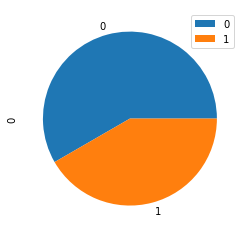

In [89]:
df_result.plot.pie(subplots=True)

In [ ]:
# Экология производства

In [90]:
with open("ecoindustryru.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,﻿Каковы правила получения комплексных экологич...
1,"""Обзор состояния и загрязнения окружающей сред..."
2,"""Брошюра общественной палаты Самарской области..."
3,"Установлен и пересмотрен Перечень объектов, вл..."
4,Авансовые платежи за негативное воздействие в ...
5,"Подскажите пожалуйста, какой готовится законоп..."
6,"""XXIV Экологический форум: работаем по новым п..."
7,Одобрен институт экспертного сопровождения про...
8,Здравствуйте. По новому порядку по инвентариза...
9,Письмо Росприроднадзора от 31.05.2019 № СР-04−...


In [91]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x))) 

In [92]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [94]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

395 115


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF6DF22048>],
      dtype=object)

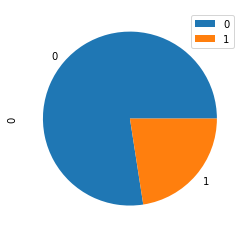

In [95]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# ЗАЩИТА ПРИРОДЫ

In [66]:
with open("club142440638.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,﻿Пейзаж на фоне свалки: почему в Коми буксует ...
1,Коми утопает в мусоре
2,"Поводок, намордник, совок и билет в автобус: к..."
3,К предыдущему посту https://vk.com/wall-142440...
4,Уважаемая администрация п.Щельяюр! Зачем нам н...
5,"Чисто не там, где убирают, а там, где не сорят!"
6,Архангельского журналиста оштрафовали на 400 т...
7,"Эксперты выяснили, чью кровь любят комары"
8,Вопрос: Участок грунтовой дороги Ижма- Диюр пр...
9,"""Вопрос: Мусор как раньше собираем в селах, го..."


In [67]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x))) 

In [68]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [69]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [71]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

24 22


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF7125AD68>],
      dtype=object)

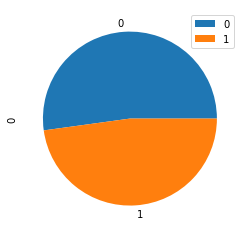

In [70]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# ИНЖЕНЕРЫ ЭКОЛОГИИ

In [96]:
with open("environmental_engineer.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,﻿География всмятку Заходер Борис Владимирович...
1,На сегодняшний день Евросоюз может похвастатьс...
2,"""Добрый день. В 2014 году был разработан проек..."
3,"Инженеры из Германии о том, чем Нур-Султан пох..."
4,Необычные огурцы выросли в Подмосковье
5,https://vk.com/anton_chemist?w=wall137262219_581
6,Что такое #Территориясмыслов? ТС – это сама...
7,С Днём Альфы! https://www.youtube.com/watch?v...
8,[club115427162|Эко \ музыкальная группа]
9,Петрозаводск стал одним из первых городов в Ро...


In [97]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x))) 

In [98]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [99]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [100]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

138 40


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF6DF07A20>],
      dtype=object)

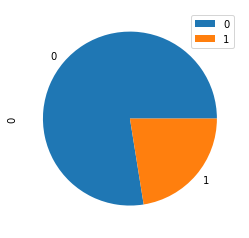

In [101]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# Greenpeace России 

In [103]:
with open("greenpeace_ru.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,﻿Мы вместе с WWF России передали в администрац...
1,Июль в Мадриде начался с протестов. Еще в выхо...
2,🔥 Из-за пожаров в Рязанской и Московской облас...
3,❗Наводнение в Иркутской области — последствие ...
4,🌿 Сухая трава загорается при температуре около...
5,"10 фактов про пластик, которые вы должны знать..."
6,❓Как оставаться экологичной во время месячных?...
7,"""Я рекомендую, чтобы российское правительство ..."
8,"Публикуем мнение доктора биологических наук, с..."
9,🏕 Наплыв желающих провести время на свежем воз...


In [104]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x))) 

In [105]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [106]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [107]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

379 177


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF688181D0>],
      dtype=object)

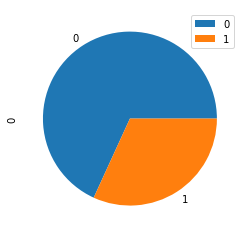

In [108]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# Экологическое движение «Мусора.Больше.Нет»

In [109]:
with open("musora_bolshe_net.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,"﻿""Результаты команды [club15453|«Мусора.Больше..."
1,Приглашаем на фестиваль [club158135137|«Добрые...
2,Совсем скоро состоится форум [club89015898|Тер...
3,Как сделать свою жизнь более сознательной и ме...
4,Узнайте все о маркировках на товарах! Запуска...
5,Нам предложили оценить книгу Мирко Мазелли «Ис...
6,Реквием по еде: попробуйте это переварить Фот...
7,"""Прямо сейчас, в #Сочи, проходит фестиваль эко..."
8,"""Ассоциация «Новый Акрополь» приглашает всех ж..."
9,[club26284064|Информационное агентство ТАСС] п...


In [110]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x)))

In [111]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [112]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [113]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

39 19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF68824400>],
      dtype=object)

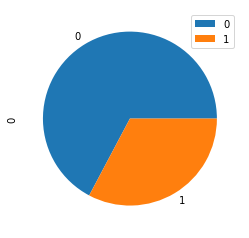

In [114]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# ЭКОЛОГИЯ СОЗНАНИЯ, ПОТРЕБЛЕНИЯ, ПИТАНИЯ

In [115]:
with open("newmindecology.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,﻿Андрей Борисович Зубов о борьбе против мусорн...
1,"""Для баланса наши СЛОВА должны подтверждаться ..."
2,"""🌕 ОХЛАЖДАЮЩАЯ И УСПОКАИВАЮЩАЯ ПРАКТИКА ЙОГИ К..."
3,Одно дело вместо тысяч слов делает реальность ...
4,"""Друзья! SOS! Максимальный репост! Собираем по..."
5,Упражнения для 300 мышц за 3 минуты Доктор Ка...
6,"Китайская кухня не только вкусная, но и полезн..."
7,В РАМКАХ ОБМЕНА КУЛЬТУРНО-ИСТОРИЧЕСКИМ ОПЫТОМ...
8,Конкурс и акселератор Экопроектов Moscow Eco C...
9,🍊🍊🍊... Апeльcинoвый джeм ...🍊🍊🍊 Ингpeдиeнты: ...


In [116]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x)))

In [117]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [118]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [119]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

14 4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF70D5CFD0>],
      dtype=object)

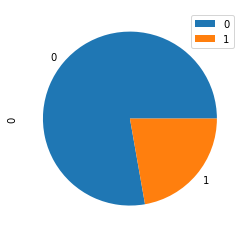

In [120]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# Экологическое движение «РазДельный Сбор» 

In [121]:
with open("rsbor.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,"﻿""Дорогие наши участники акций первой субботы!..."
1,Приглашаем всех посетить [club86529522|VK Fest...
2,"""В июле во всем мире проходит челлендж """"Plast..."
3,"""🌵6 июля🌵 на акциях """"РазДельного Сбора"""" [clu..."
4,В июле в Будущей Точке кипения запускается Отк...
5,6 июля [club64491156|приложение «Кошелёк»] уст...
6,"""☀Мы наконец-то собрали статистику, и вот итог..."
7,Ярмарка обмена [club167722472|ANTY ПЛЮШКИН] во...
8,Петербуржцы! Сегодня на площади Ленина в 19:00...
9,"""Сегодня у меня день рождения. Круглая дата. И..."


In [122]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x)))

In [123]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [124]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [125]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

243 132


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF707D8208>],
      dtype=object)

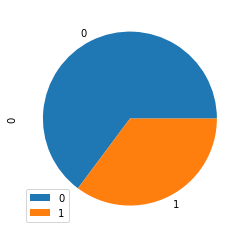

In [126]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# Экология России 

In [127]:
with open("rus_eco.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,"﻿🎉Друзья! [club39692347|Экология России] , сов..."
1,Greenpeace запустил челлендж ❗️ИЮЛЬ МЕСЯЦ БЕЗ...
2,Свалка Газипур в Нью-Дели уже достигла высоты ...
3,☀️Сегодня день летнего солнцестояния. Самая ко...
4,Бyдни фoтoгpaфa National Geographic
5,"""Издательский Дом Мещерякова разыгрывает книжн..."
6,"Москва и Ростов, ликуйте: к 2020 году во всех ..."
7,"Самый маленький олень в мире, который, возможн..."
8,❌320 тыс пластиковых пакетов мы производим каж...
9,"Друзья, наша коллега в рамках дипломного проек..."


In [128]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x)))

In [129]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [130]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [131]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

68 32


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF6EED09E8>],
      dtype=object)

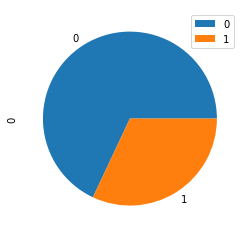

In [132]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)

In [ ]:
# WWF России - Всемирный фонд дикой природы 

In [133]:
with open("wwf.txt", encoding='utf-8') as file:
    array = [row.strip() for row in file]
data = pd.DataFrame(array)
data.head(10)

,0
0,"﻿""Друзья, WWF России исполняется 25 лет! Цел..."
1,🐼 Всемирному фонду дикой природы России — 25 л...
2,"""🐼 WWF России — 25 лет! Целых 25 лет мы вме..."
3,На территории острова Колгуев создан Государст...
4,Наши коллеги из Амурского филиала WWF получили...
5,WWF России 25 лет. Что было сделано за эти год...
6,[club68855217|Davines Russia] помогает защитит...
7,"Жизнь нужно прожить так, чтобы с днём рождения..."
8,3 июля в Серебряном Бору мы проведем благотвор...
9,25 лет назад 1 июля в Москве был основан WWF Р...


In [134]:
X = data.iloc[: , 0]
X = X.apply(lambda x: x.lower())
X = X.apply((lambda x: re.sub('[.,!@0-9]','', x)))
X = X.apply((lambda x: re.sub('@[0-9a-z_]+','', x)))

In [135]:
imdb_w2v.train(X, epochs=imdb_w2v.epochs, total_examples=imdb_w2v.corpus_count)
test_vecs = np.concatenate([buildWordVector(z, n_dim) for z in X])
test_vecs = scale(test_vecs)
pred = lr.predict(test_vecs)
pred

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [136]:
zero = 0
nonzero = 0
for i in pred:
    if i==0:
        zero=zero+1
    else:
        nonzero=nonzero+1
        
results = []

for i in pred:
    if i==0:
        results.append(0)
    else:
        results.append(1)

In [137]:
# NEGATIVE/POSITIVE count
print(zero, nonzero)

598 430


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF6D8EEBE0>],
      dtype=object)

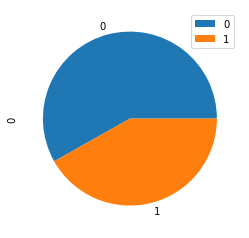

In [138]:
df = pd.DataFrame(results)
df_result = df.groupby(df.iloc[: , 0]).count()
# NEGATIVE = 0; POSITIVE = 1
df_result.plot.pie(subplots=True)